# Week 7: EDA and Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
news = pd.read_csv("news_data.csv").drop(columns=["Unnamed: 0", "Unnamed: 0.1"])
news = news[news["text"].apply(type) == str].dropna()
news

,title,text,label
0,Trump's women problem,"(CNN) The thing about women, Donald J. Trump o...",REAL
1,Detroit women’s Halloween decorations depict ‘...,Print \n[Ed. – How to take the fun out of Hall...,FAKE
2,Comment on Invention Secrecy At All-Time High:...,Share on Facebook Share on Twitter Government ...,FAKE
3,Re: French Political Leader: “France is about ...,"Email \nA major political leader in France, Fr...",FAKE
4,"“If Trump Loses, I’m Grabbing My Musket”: Form...",324 324 likes \nHis heated rhetoric is a respo...,FAKE
...,...,...,...
6335,Housing In 2015: Four Reasons For Optimism (An...,Housing In 2015: Four Reasons For Optimism (An...,REAL
6336,"'You've been fleeced': Congress grills Kerry, ...",Secretary of State John Kerry found himself on...,REAL
6337,Obama reportedly snubs NATO chief as Russia ma...,President Barack Obama reportedly will not mee...,REAL
6338,Gold prices on the way to all-time highs,"Font Size ""What does the rising gold price mea...",FAKE


### Section 1: Train Test Split

Now we are at the stage of model development! We want to start off this part by splitting our dataset into training and testing sets. The purpose of this is to test the performance of the model on unseen data. By evaluating our model on a separate test, we can see if the model is actually accurate or if it just memorized the training data, which we don't want it to do.

To do this step, you will want to use sci-kit learn function: train_test_split

Let's set our test_size to 0.3 and random_state parameter to 42!

In [ ]:
X = news[["title","text"]] #your feature columns
Y = news["label"] #variable you are trying to predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
train_w_labels = X_train
train_w_labels["labels"] = y_train
train_w_labels

,title,text,labels
2773,Charles Krauthammer: Obama: Charlie who?,"On Sunday, at the great Paris rally, the whole...",REAL
6053,Jake Tapper to moderate 's first GOP debate,"Tapper, the host of the network's ""State of th...",REAL
732,2016ers hail release of U.S. prisoners held by...,Washington (CNN) White House hopefuls on both ...,REAL
5839,Suspects In Paris Magazine Attack Killed; Mark...,Suspects In Paris Magazine Attack Killed; Mark...,REAL
292,Yemeni forces fire ballistic missile at Saudi ...,Yemen This photo provided by the media bureau ...,FAKE
...,...,...,...
3775,"Unsurprisingly, this Ku Klux Klan leaflet has ...","Next Prev Swipe left/right Unsurprisingly, thi...",FAKE
5195,‘Ignored’ voter to become ‘absolutely shafted’...,‘Ignored’ voter to become ‘absolutely shafted’...,FAKE
5230,Conspiracy theories swirl around the death of ...,Two days after Supreme Court Justice Antonin S...,REAL
5394,"FBI: Orlando suspect U.S. citizen, vowed alleg...","PORT ST. LUCIE, Fla. — Investigators were revi...",REAL


In [ ]:
X_train = (X_train.reset_index())
X_train["text"]

0       On Sunday, at the great Paris rally, the whole...
1       Tapper, the host of the network's "State of th...
2       Washington (CNN) White House hopefuls on both ...
3       Suspects In Paris Magazine Attack Killed; Mark...
4       Yemen This photo provided by the media bureau ...
                              ...                        
4429    Next Prev Swipe left/right Unsurprisingly, thi...
4430    ‘Ignored’ voter to become ‘absolutely shafted’...
4431    Two days after Supreme Court Justice Antonin S...
4432    PORT ST. LUCIE, Fla. — Investigators were revi...
4433    Scientists About To Pour $100 Million Into Loo...
Name: text, Length: 4434, dtype: object

In [ ]:
X_test = (X_test.reset_index())
X_test["text"]

0       HUGE Air Drill, Over 130 Command Centers in Ru...
1       S.E. Cupp is the author of "Losing Our Religio...
2       Drugstore chain Walgreens Boots Alliance (WBA)...
3       5 Things You Should Know About George Pataki\n...
4       In this News Shot, Joe Joseph quickly discusse...
                              ...                        
1896    This post has been updated.\n\nVeteran counter...
1897    Kaiser Sousa Oct 26, 2016 4:07 PM \nwhen i awo...
1898    A woman who got fired after two days of workin...
1899    The younger Trump swears his foundation gives ...
1900    Trump Will Skip GOP Debate As Feud With Fox Ne...
Name: text, Length: 1901, dtype: object

In [ ]:
news

,title,text,label
0,Trump's women problem,"(CNN) The thing about women, Donald J. Trump o...",REAL
1,Detroit women’s Halloween decorations depict ‘...,Print \n[Ed. – How to take the fun out of Hall...,FAKE
2,Comment on Invention Secrecy At All-Time High:...,Share on Facebook Share on Twitter Government ...,FAKE
3,Re: French Political Leader: “France is about ...,"Email \nA major political leader in France, Fr...",FAKE
4,"“If Trump Loses, I’m Grabbing My Musket”: Form...",324 324 likes \nHis heated rhetoric is a respo...,FAKE
...,...,...,...
6335,Housing In 2015: Four Reasons For Optimism (An...,Housing In 2015: Four Reasons For Optimism (An...,REAL
6336,"'You've been fleeced': Congress grills Kerry, ...",Secretary of State John Kerry found himself on...,REAL
6337,Obama reportedly snubs NATO chief as Russia ma...,President Barack Obama reportedly will not mee...,REAL
6338,Gold prices on the way to all-time highs,"Font Size ""What does the rising gold price mea...",FAKE


### Section 2: EDA & Feature Engineering

Keeping in mind everything we learned in this week's presentation, let's start some EDA and feature engineering!

Our end goal is to be able to distinguish between fake and real news articles. One way to go about this is by checking the frequency at which certain words appear in fake or real articles. If we can find a word that appears in fake articles far more often than real ones, or vice versa, our model can use that word to make a better guess!

Task 1: What words do you think might appear more frequently in fake articles than real ones, or vice versa?

More frequent in fake articles: "!", "?", "science", "source", "best", "worst", "free", capitalized words / sentences

More frequent in real articles: "according", "dr", "report", "claim", "potential"

Task 2: What do you think is important to consider when trying to figure out which words are more polarizing?

The difference in frequencies between that words in fake vs. real articles as well as the absolute frequency of the word in each type of article.

Task 3: Fill in the skeleton code below to complete the word_map function.

In [ ]:
def word_map(words, texts):
    """
    arguments --
        words:
        texts:
    returns --
        A 2D array of 0s and 1s of dimension (x, y) where x is 
        the length of 'words' and y is the length of 'texts'.
        The value at position (i, j) in the returned array should
        contain 1 if the i-th word in 'words' is found in the
        j-th string in 'texts', and 0 otherwise.
    
    example:

    word_map(words=["hello", "world", "words"], 
                texts=["hello world", "this is all zeroes", "the world has a lot of words"])
            
    >>> [[1, 1, 0],
         [0, 0, 0],
         [0, 1, 1]]
    """
    matrix = []
    for i in range(len(texts)):
        words_vector = [False] * len(words) # fixme
        if(type(texts[i]) == str):
            for j in range(len(words)):    
                words_vector[j] = texts[i].find(words[j]) >= 0 # fixme
        matrix.append(list(words_vector))
    return(matrix)

Task 4: Pick some words! Populate the 'words' list below with a handful of words (you'll revise these later), and run the following cell.

In [ ]:
words = ["!", "?", "science", "source", "best", "worst", "free"] # fixme

In [ ]:
# Just run this cell
just_labels = pd.DataFrame(y_train)
to_plot = just_labels
to_plot[words] = word_map(words, X_train["text"])
to_plot

,label,!,?,science,source,best,worst,free
2773,REAL,False,True,False,False,False,False,True
6053,REAL,False,False,False,False,False,False,False
732,REAL,False,False,False,False,False,False,True
5839,REAL,False,False,False,True,True,True,True
292,FAKE,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
3775,FAKE,False,False,False,False,False,False,False
5195,FAKE,False,True,False,False,False,False,False
5230,REAL,False,True,False,False,False,False,False
5394,REAL,False,False,True,True,False,False,False


Task 5: What do each of the rows in the above dataframe represent? What do the values in each of the columns represent?

Each row represents an article and its body of text. Each column represents the classification of the article and whether or not it contains a certain word.

In [ ]:
# Just run this cell
to_plot = to_plot.melt("label").groupby(["label", "variable"]).agg(np.mean).reset_index()
to_plot = to_plot.rename(columns={"value": "proportion"})
to_plot

,label,variable,proportion
0,FAKE,!,0.294808
1,FAKE,?,0.446953
2,FAKE,best,0.152596
3,FAKE,free,0.210835
4,FAKE,science,0.047856
5,FAKE,source,0.192777
6,FAKE,worst,0.050113
7,REAL,!,0.128887
8,REAL,?,0.419108
9,REAL,best,0.215412


Task 6: What do each of the rows in the above data frame represent? What do the values in each of the columns represent?

Each row represents an article and its body of text. The columns represent the following: label (whether the article is fake or real), variable (what word we are testing), and the proportion of articles with the same label that contain that that word.

Task 7: EDA! 

Use bar plots, heat maps, histograms, or whatever you think is most appropriate to visualize how well represented each word in your 'words' list is in fake and real articles. Make sure to include a descriptive title and axis labels on your visualization!

In [ ]:
# feel free to re-declare your 'words' list here, so you don't have to keep re-running the cell above!
new_words = ["millionaire","billionaire","rich","wealth","kill","death","steal"]

# The code below has been copied from above so you don't have to keep re-running those cells
to_plot = just_labels

to_plot[new_words] = word_map(new_words, X_train["text"])
to_plot = to_plot.melt("label").groupby(["label", "variable"]).agg(np.mean).reset_index()
to_plot = to_plot.rename(columns={"value": "proportion"})

<AxesSubplot: xlabel='variable', ylabel='proportion'>

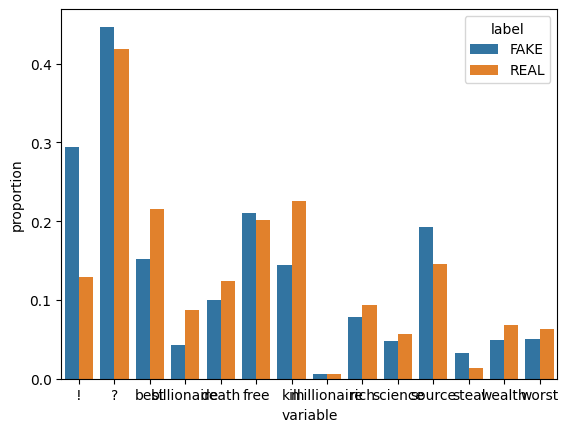

In [ ]:
# visualize the to_plot dataframe here using whichever visualization technique you think is most appropriate
sns.barplot(data = to_plot, x = "variable", y = "proportion", hue = "label")

Task 8: Reflect on the process you used to determine which words were best. How did you choose them? Why did you choose them?

Some of the best words / characters were "!", """, "#", "war", and "tax". We tested words that we thought would be more likely to be used in one type of article than the other, and kept the ones that had not only a large difference in the proportion that they were used in each type of article, but also had a large absolute use proportions.

### You finished week 7! If you have any questions, feel free to reach out as always :)

# Week 8: DIY Feature Engineering + EDA

This week's tasks are obviously very open-ended, so don't hesitate to reach out if you need help/clarification!

### Section 1: EDA

In this part of the notebook, you will be doing your own data exploration and analysis to derive your own set of features. As mentioned during the meeting, some ideas you could do is the length of the article, the ratio from lowercase to uppercase letters, or data transformation on pre-existing features! Feel free to experiment on whatever you would like. 

Again, make sure to utilize data visualization tools from MatPlotLib and SeaBorn to see if this particular feature is optimal or not! 

Feel free to add cells, delete cells, or do whatever!

<AxesSubplot: xlabel='variable', ylabel='proportion'>

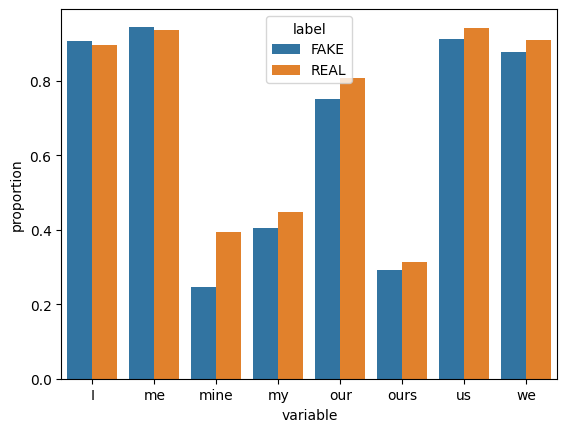

In [ ]:
first_prons = ['I', 'me', 'my', 'mine','we', 'us', 'our','ours']
sec_prons = ['you', 'your', 'yours', 'yourself', 'yourselves']
third_prons = ['he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves']

just_labels = pd.DataFrame(y_train)
to_plot = just_labels

to_plot[first_prons] = word_map(first_prons, X_train["text"])
to_plot = to_plot.melt("label").groupby(["label", "variable"]).agg(np.mean).reset_index()
to_plot = to_plot.rename(columns={"value": "proportion"})

sns.barplot(data = to_plot, x = "variable", y = "proportion", hue = "label")

Note: The project that inspired this one used 3-7 features, but you can definitely try less or more. You will be evaluating + refining your model in the upcoming weeks, so don't get caught up on the small details right now.

Task 1: What are some features you are thinking of adding? What are some functions or data visualization tools you can use to test its functionality? Feel free to use this space to think through the possible steps you will take to achieve your goals. 

Features:

- ratio from lowercase to uppercase letters

- frequency of each type of pronoun

- frequency of contractions

- proportions of certain punctuation like "!", " " ", " ' ", "#"

- proportions of key words found in previous week like "war", "tax", "US"

EDA tools:

- word frequency barplots grouped by article class

- heat map visualization for different wor

- \

### Section 2: Build Your Features

In this section of the notebook, you'll work on creating new features based on what you learned from your EDA.

Remember, making new features is as simple as defining functions that can be applied to your training data when it comes time to implement them and train our models next week. For example, if I decided from my EDA that the length of the article's headline, I could implement a function like the one below.

In [ ]:
# Example of the feature creation and implementation process (feel free to delete/comment out)
def headline_length(headline):
    return len(headline)

Then, when it comes time to train my model, I can use the feature function I created to make a new column in my training data (like the pic below), and then fit my model to this data.

<img src="Screenshot 2023-11-09 at 3.45.34 PM.png" width="50%" align="left" />

Again, implementing these features in our data and training our model is next week's task, so for now just define the functions and test to make sure they work. In other words, don't add any columns to X_train yet!

In [ ]:
# Define your features here!

In [ ]:
def capital_ratio(text):
    count = 0
    for ltr in text:
        if ltr.isupper():
            count += 1
    return (count / len(text))

capital_ratio("AAa9")

0.5

In [ ]:
#given text, returns the frequency of all pronouns in the text that are of that specific pronoun type
import re

first_prons = ['I', 'me', 'my', 'mine','we', 'us', 'our','ours']
second_prons = ['you', 'your', 'yours', 'yourself', 'yourselves']
third_prons = ['he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves']

def first_pronoun_freq(text):
    all_prons =  ['I', 'you',  'my',  'mine',  'myself'  'we',  'us',  'our',  'ours',  'ourselves'  'you',  'your',  'yours',  'yourself' ,  'yourselves' 'he', 'him',  'his',  'himself',  'she',  'her',  'herself'  'it',  'its',  'itself'  'they',  'them',  'their',  'theirs',  'themself',  'themselves']
    all_pron_count = 0
    pron_count = 0
    split_text = re.findall(r"[\w']+|[.,!?;':-]", text)
    if(len(split_text) > 0):
        for wrd in split_text:
            if wrd in all_prons:
                all_pron_count += 1
                if wrd in first_prons:
                    pron_count += 1
        if(all_pron_count > 0):
            return (pron_count / all_pron_count)
    return(0)

def second_pronoun_freq(text):
    all_prons =  ['I', 'you',  'my',  'mine',  'myself'  'we',  'us',  'our',  'ours',  'ourselves'  'you',  'your',  'yours',  'yourself' ,  'yourselves' 'he', 'him',  'his',  'himself',  'she',  'her',  'herself'  'it',  'its',  'itself'  'they',  'them',  'their',  'theirs',  'themself',  'themselves']
    all_pron_count = 0
    pron_count = 0
    split_text = re.findall(r"[\w']+|[.,!?;':-]", text)
    if(len(split_text) > 0):
        for wrd in split_text:
            if wrd in all_prons:
                all_pron_count += 1
                if wrd in second_prons:
                    pron_count += 1
        if(all_pron_count > 0):
            return (pron_count / all_pron_count)
    return(0)

def third_pronoun_freq(text):
    all_prons =  ['I', 'you',  'my',  'mine',  'myself'  'we',  'us',  'our',  'ours',  'ourselves'  'you',  'your',  'yours',  'yourself' ,  'yourselves' 'he', 'him',  'his',  'himself',  'she',  'her',  'herself'  'it',  'its',  'itself'  'they',  'them',  'their',  'theirs',  'themself',  'themselves']
    all_pron_count = 0
    pron_count = 0
    split_text = re.findall(r"[\w']+|[.,!?;':-]", text)
    if(len(split_text) > 0):
        for wrd in split_text:
            if wrd in all_prons:
                all_pron_count += 1
                if wrd in third_prons:
                    pron_count += 1
        if(all_pron_count > 0):
            return (pron_count / all_pron_count)
    return(0)

first_pronoun_freq("my, my. my you! you you")

0.5

In [ ]:
def contract_freq(text):
    count = 0
    #split_text = text.split()
    split_text = re.findall(r"[\w']+|[.,!?;:-]", text)
    if (len(split_text) > 0):
        for wrd in split_text:
            if "'" in wrd:
                count += 1
        return (count / len(split_text))
    return(0)

contract_freq("Iasdfasdfad can't, if I! don't")

0.2857142857142857

<AxesSubplot: xlabel='labels', ylabel='title_capital_ratio'>

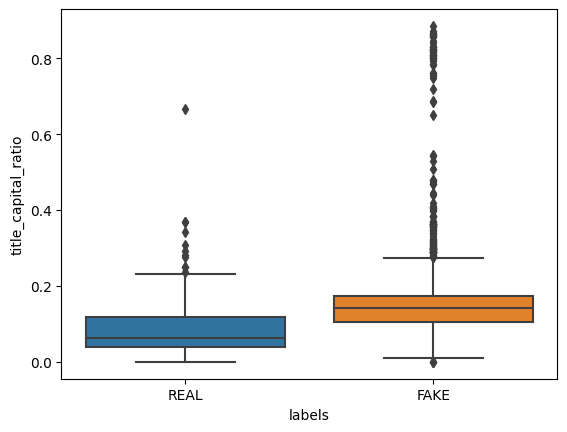

In [ ]:
train_w_labels["title_capital_ratio"] = train_w_labels["title"].apply(capital_ratio)
sns.boxplot(data = train_w_labels, x = "labels", y="title_capital_ratio")

<AxesSubplot: xlabel='labels', ylabel='first_pronoun_freq'>

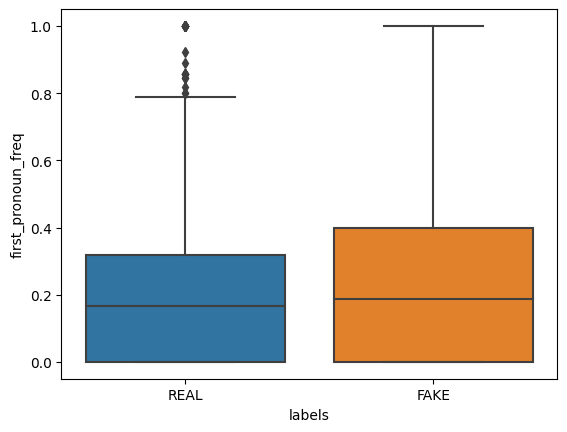

In [ ]:
train_w_labels["first_pronoun_freq"] = train_w_labels["text"].apply(first_pronoun_freq)
sns.boxplot(data = train_w_labels, x = "labels", y="first_pronoun_freq")

<AxesSubplot: xlabel='labels', ylabel='second_pronoun_freq'>

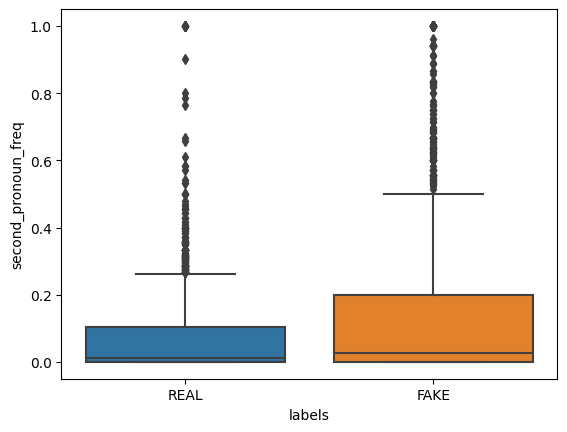

In [ ]:
train_w_labels["second_pronoun_freq"] = train_w_labels["text"].apply(second_pronoun_freq)
sns.boxplot(data = train_w_labels, x = "labels", y="second_pronoun_freq")

<AxesSubplot: xlabel='labels', ylabel='third_pronoun_freq'>

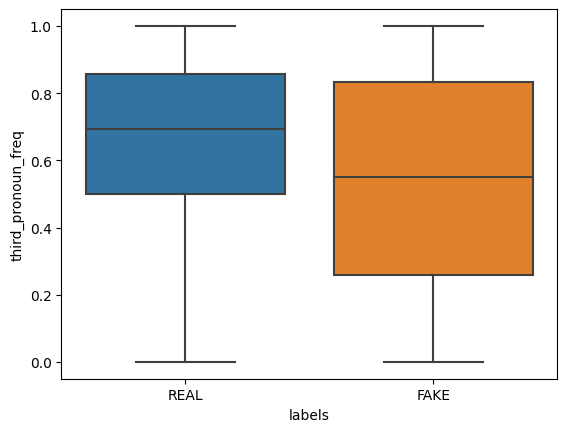

In [ ]:
train_w_labels["third_pronoun_freq"] = train_w_labels["text"].apply(third_pronoun_freq)
sns.boxplot(data = train_w_labels, x = "labels", y="third_pronoun_freq")

<AxesSubplot: xlabel='labels', ylabel='contract_freq'>

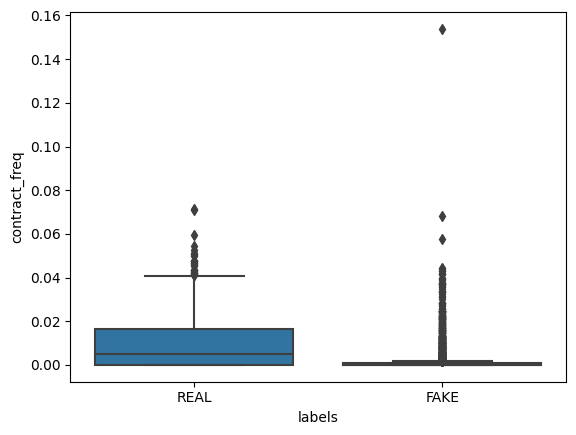

In [ ]:
train_w_labels["contract_freq"] = train_w_labels["text"].apply(contract_freq)
sns.boxplot(data = train_w_labels, x = "labels", y="contract_freq")

# Week 9: Model Evaluation

This week your goal is to see how well your model is performing given the features you defined last week using a pipeline function.

To get started, please copy the following cells into your working (Week 7) notebook

### Section 1: Build a Pipeline Function

Pipeline functions allow us to string together the features we develop into one cohesive transformation of the input data. They take in our original data and return the features we will use to fit our logistic regression model.

Task 1: Complete the skeleton code for the pipeline function below

In [ ]:
def pipeline(X_data):
    
    """
    Return X_piped, a dataframe with the same number of rows as X_data but whose columns 
    each represent a unique feature.
    Note: X_data (the input) should have the same format as X_train and X_test
    """

   
    words_features = word_map(words, list(X_data["text"]))
    X_piped = pd.DataFrame(columns=words, data=words_features)
    #X_piped = pd.DataFrame()

    cap_ratio = X_data["text"].apply(capital_ratio) # fixme
    first_pron_ratio = X_data["text"].apply(first_pronoun_freq)
    second_pron_ratio = X_data["text"].apply(second_pronoun_freq)
    third_pron_ratio = X_data["text"].apply(third_pronoun_freq)
    contraction_ratio = X_data["text"].apply(contract_freq)

    title_cap_ratio = X_data["title"].apply(capital_ratio)
    
    X_piped["cap_ratio"] = cap_ratio
    X_piped["first_pron_ratio"] = first_pron_ratio
    X_piped["second_pron_ratio"] = second_pron_ratio
    X_piped["third_pron_ratio"] = third_pron_ratio
    X_piped["contraction_ratio"] = contraction_ratio

    X_piped["title_cap_ratio"] = title_cap_ratio

    return X_piped

In [ ]:
words = ["'s","s'","US","U.S.","article","tax", "'",'"',"#","!","=","&","Dr.","etc."]
#words = ["I'm","im","Im"]

<AxesSubplot: xlabel='variable', ylabel='proportion'>

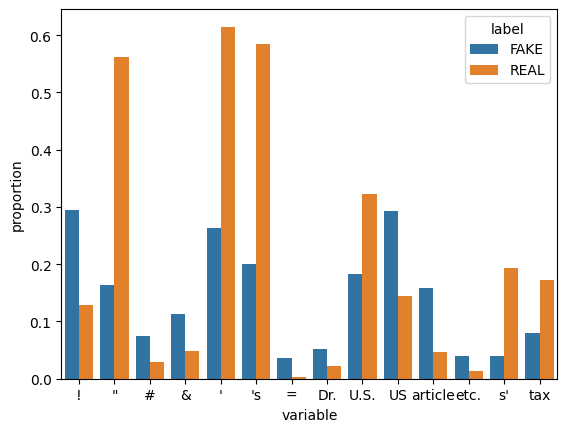

In [ ]:
just_labels = pd.DataFrame(y_train)
to_plot = just_labels

to_plot[words] = word_map(words, X_train["text"])
to_plot = to_plot.melt("label").groupby(["label", "variable"]).agg(np.mean).reset_index()
to_plot = to_plot.rename(columns={"value": "proportion"})

sns.barplot(data = to_plot, x = "variable", y = "proportion", hue = "label")

### Section 2: Evaluate the Accuracy of Your Model

Now that we have our pipeline function set up, it's time to see how well your model performs!

Task 2: Complete the skeleton code below to fit your model to your feature-transformed data

Note: Remember that you should only use your pipeline function on your X data. 

In [ ]:
from sklearn.linear_model import *
X_train = pipeline(X_train) # Transform X_train using your pipeline function
y_train = y_train.values

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Task 3: Evaluate your training and testing accuracy using the .score LogisticRegression() method

Check out the documentation if you get stuck!

In [ ]:
training_accuracy = model.score(X_train,y_train) # fixme

X_test = pipeline(X_test)

testing_accuracy = model.score(X_test,y_test) # fixme

print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

Training Accuracy: 0.8119079837618404
Testing Accuracy: 0.8085218306154656


In [ ]:
X_train

,rare,article,U.S.,cap_ratio,first_pron_ratio,second_pron_ratio,third_pron_ratio,contraction_ratio
0,False,False,True,0.028440,0.200000,0.000000,0.800000,0.000000
1,False,False,False,0.038786,0.000000,0.000000,1.000000,0.026316
2,False,False,True,0.036539,0.542857,0.028571,0.428571,0.023116
3,False,False,True,0.039465,0.250000,0.093750,0.656250,0.013338
4,False,False,False,0.033245,0.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...
4429,False,False,False,0.069815,0.000000,0.000000,0.000000,0.010989
4430,False,False,False,0.023449,0.222222,0.000000,0.777778,0.000000
4431,False,False,True,0.036323,0.071429,0.000000,0.928571,0.000000
4432,False,False,True,0.036720,0.100000,0.000000,0.900000,0.016114


Note: Don't be discouraged if your accuracies are low! Getting a high score using the techniques we've gone over so far turned out to be a lot more difficult than expected, so we'll be going over some new techniques next week to improve them!

Task 4: How did you do? Did your model perform better or worse than you expected?

Better than we expected. Our peak accuracy was around 80%, so we are getting it right four-fifths of the time, which is pretty good considering the simplicity of our model and our features.

Task 5: How did your training accuracy differ from your testing accuracy? Why are they different?

They were always different, but not that much. They were different because the testing data and entirely different set of data, so our model will likely accurately classify the exact same proportion of this data. The fact that the training and testing accuracies weren't that different is good, because it means we weren't overfitting

Task 6: Try tweaking the features you use and see how your accuracy changes. Improve the model as best you can, but try to only make improvements to the training accuracy, as you wouldn't be able to see the testing accuracy in the real world! [no response necessary, just do the work above]

Task 2: Explain how you chose each feature you built (doesn't have to be extensive, just explain what EDA you did to justify defining it).

For all of the word features we used, we looked for two things: one, that there was a large difference between the proportions of fake/real articles that contained the word, two, that there was a decently large absolute use proportion for both the fake and real articles (but if this wasn't the case and there was a massive difference we still used the word). We determined this using bar charts. For our other features, we chose them by checking if on average their values differed significantly for fake vs. real articles. We did this by using box plots.

### All done for week 8! Congrats on finishing, and let us know if you have any questions :)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e4d9be71-2611-452e-bb7a-f8e6efcd227c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>